In [1]:
import numpy as np
desejada = np.genfromtxt('lbl_fluxos.txt')

In [2]:
prevista = np.genfromtxt('outputs.txt')

In [3]:
#Acuracia
from sklearn.metrics import accuracy_score
accuracy_score(desejada, prevista)

0.9190311418685121

In [4]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(desejada, prevista).ravel()

In [5]:
precision = tp / (tp + fp)
sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print("Precisão: ", precision)
print("Sensibilidade: ", sensibilidade)
print("Especificidade: ", especificidade)

Precisão:  0.2
Sensibilidade:  0.008771929824561403
Especificidade:  0.9969947407963937


In [6]:
print(confusion_matrix(desejada, prevista))

[[1327    4]
 [ 113    1]]


In [7]:
from sklearn.metrics import precision_score
precision_score(desejada, prevista, average='micro') 

0.9190311418685121

In [8]:
proba = np.genfromtxt('proba.txt', delimiter=',')
print(proba)

[[0.95704578 0.04295422]
 [0.88680319 0.11319681]
 [0.81752735 0.18247265]
 ...
 [0.88888014 0.11111986]
 [0.88896189 0.11103811]
 [0.88936411 0.11063589]]


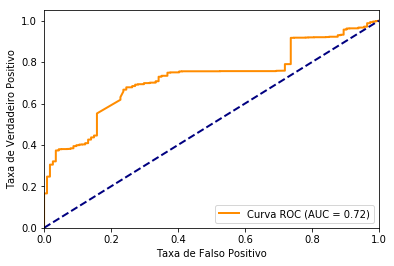

In [9]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


    
a = []
for i in range(len(desejada)):
    if desejada[i] == 0:
        a.append([1, 0])
    else:
        a.append([0, 1])
a = np.array(a)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(a[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(a.ravel(), proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='Curva ROC (AUC = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
#plt.title(titulo)
plt.legend(loc="lower right")
plt.show()